Pick a website and describe your objective

- Identify the information you'd like to scrape
- Decide the format of the output CSV file
- Type the format into an Excel file

### Project Outline

- We're going to scrape https://www.brewersassociation.org/directories/breweries/
- We'll get a list of U.S. breweries. For each brewery, we'll get name, address, draft beer prices, and URL.

In [1]:
import requests

In [2]:
import numpy as np
import pandas as pd
import os
import requests
from bs4 import BeautifulSoup

In [3]:
brewery_url = 'https://dwbbrewery.com'

In [4]:
response = requests.get(brewery_url)

In [5]:
response.status_code

200

In [6]:
len(response.text)

216585

In [7]:
page_contents = response.text

Use the requests library to download web pages

- Inspect the website's HTML source and identify the right URLs to download
- Download and save web pages locally using the requests library
- Create a function to automate downloading for different topics/search queries

In [8]:
soup = BeautifulSoup(page_contents, 'html.parser')

In [9]:
type(soup)

bs4.BeautifulSoup

In [10]:
div_tags = soup.find_all('div')

In [11]:
len(div_tags)

164

In [12]:
div_tags

[<div id="page-container"><div id="top-header"><div class="container clearfix"><div id="et-info"> <span id="et-info-phone">(719) 394-4811</span> <a href="mailto:dueces@dwbbrewery.com"><span id="et-info-email">dueces@dwbbrewery.com</span></a></div><div id="et-secondary-menu"><ul class="menu" id="et-secondary-nav"><li class="secondary-button menu-item menu-item-type-post_type menu-item-object-page menu-item-262"><a href="https://dwbbrewery.com/dwb-on-tap-at/">Find us on Tap</a></li></ul><a class="et-cart-info" href="https://dwbbrewery.com/cart/"> <span>0 Items</span> </a></div></div></div><header data-height-onload="110" id="main-header"><div class="container clearfix et_menu_container"><div class="logo_container"> <span class="logo_helper"></span> <a href="https://dwbbrewery.com/"> <img alt="Dueces Wild Brewery" data-height-percentage="100" height="200" id="logo" src="https://dwbbrewery.com/wp-content/uploads/2019/01/DWB-Logo-0418-White_tiny.png" width="300"/> </a></div><div data-fixed-

In [13]:
selection_class = 'et_pb_text_inner'

In [14]:
div_tags = soup.find_all('div', {'class': selection_class})

In [15]:
len(div_tags)

19

In [16]:
div_tags[16].text

'Monday– Closed to make Damn Good BeerTuesday & Wednesday: 3:00pm-8:00pmThursday- 3:00pm-9:00pmFriday & Saturday- 12:00pm-10:00pmSunday: 11:00am – 6:00pm'

In [17]:
x = div_tags[16].text

In [18]:
import re

In [19]:
y = re.findall('^Monday– Closed to make Damn Good BeerTuesday & Wednesday: 3:00pm-8:00pmThursday- 3:00pm-9:00pmFriday & Saturday- ([0-9.]+)',x)

In [20]:
y

['12']

In [21]:
y1 = re.findall('^Monday– Closed to make Damn Good BeerTuesday & Wednesday: 3:00pm-8:00pmThursday- 3:00pm-9:00pmFriday & Saturday- 12:00pm-([0-9.]+)',x)

In [22]:
y1

['10']

In [23]:
cerberus_url = 'https://www.cerberusbrewingco.com/'

In [24]:
response2 = requests.get(cerberus_url)

In [25]:
response2.status_code

200

In [26]:
cerberuspage_contents = response2.text

In [27]:
cerberus = BeautifulSoup(cerberuspage_contents, 'html.parser')

In [28]:
cerberus_div_tags = cerberus.find_all('div')

In [29]:
len(cerberus_div_tags)

67

In [30]:
cerberus_div_tags

[<div class="body-wrap">
 <div id="header">
 <div class="nav-trigger hamburger">
 <div class="open-btn">
 <span class="mobile"></span>
 <span class="mobile"></span>
 <span class="mobile"></span>
 </div>
 </div>
 <div id="sitename"><span class="wsite-logo">
 <span class="wsite-title-placeholder"> </span><span style="display:none">
 <span style="display:none">Cerberus Menus</span>
 </span>
 </span></div>
 </div>
 <div id="wrapper">
 <div class="bg-wrapper">
 <div id="navigation"><ul class="wsite-menu-default">
 <li class="wsite-menu-item-wrap" id="active">
 <a class="wsite-menu-item" href="/">
 				Home
 			</a>
 </li>
 <li class="wsite-menu-item-wrap" id="pg667776375114577416">
 <a class="wsite-menu-item" href="/beer.html">
 				Beer
 			</a>
 </li>
 <li class="wsite-menu-item-wrap" id="pg319834714943881369">
 <a class="wsite-menu-item" href="/food.html">
 				Food
 			</a>
 </li>
 <li class="wsite-menu-item-wrap" id="pg147623582379328503">
 <a class="wsite-menu-item" href="/cocktails--

In [31]:
selection_class2 = 'paragraph'

In [32]:
cerberus_div_tags = cerberus.find_all('div', {'class': selection_class2})

In [33]:
cerberus_div_tags[4]

<div class="paragraph" style="text-align:center;"><span style="color:rgb(218, 68, 68)"> CURRENTLY SERVING:</span><br/><span style="color:rgb(218, 68, 68)">FULL MENU INSIDE, ON THE PATIO &amp; HEATED BEER GARDEN TENT</span><br/><br/><span style="color:rgb(218, 68, 68)">Well behaved dogs always welcome in our outdoor spaces</span><br/><br/><span style="color:rgb(218, 68, 68)">SUN-THURS 11AM-8PM • FRI &amp; SAT 11AM-9PM</span><br/><span style="color:rgb(218, 68, 68)">702 W. COLORADO AVE • 719-636-2337</span><br/><a href="mailto:info@cerberusbrewingco.com">info@cerberusbrewingco.com<br/>​</a><br/><span style="color:rgb(218, 68, 68)">​ORDER TO GO ONLINE </span><a href="https://cerberus.alohaorderonline.com/" target="_blank">HERE</a><span style="color:rgb(218, 68, 68)"> OR BY CALLING US</span></div>

In [34]:
x2 = cerberus_div_tags[4].text

In [35]:
y2 = re.findall('^\xa0CURRENTLY SERVING:FULL MENU INSIDE, ON THE PATIO & HEATED BEER GARDEN TENTWell behaved dogs always welcome in our outdoor spacesSUN-THURS ([0-9.]+)',x2)

In [36]:
y2

['11']

In [37]:
y3 = re.findall('^\xa0CURRENTLY SERVING:FULL MENU INSIDE, ON THE PATIO & HEATED BEER GARDEN TENTWell behaved dogs always welcome in our outdoor spacesSUN-THURS 11AM-([0-9.]+)',x2)

In [38]:
y3

['8']

In [39]:
goatpatchbrewery_url = 'https://www.goatpatchbrewing.com/'

In [40]:
response3 = requests.get(goatpatchbrewery_url)

In [41]:
response3.status_code

200

In [42]:
gp_page_contents = response3.text

In [43]:
gp_soup = BeautifulSoup(gp_page_contents, 'html.parser')

In [44]:
gp_div_tags = gp_soup.find_all('div')

In [45]:
selection_class3 = 'sqs-block-content'

In [46]:
gp_div_tags = gp_soup.find_all('div', {'class': selection_class3})

In [47]:
len(gp_div_tags)

24

In [48]:
gp_div_tags[15].text

'CURRENT TAPROOM HOURS:12pm - 9pm | MONDAY - THURSDAY 12Pm -10pm | FRI11am - 10pm | Sat11am - 8pm | SUN'

In [49]:
x3 = gp_div_tags[15].text

In [50]:
y4 = re.findall('^CURRENT TAPROOM HOURS:12pm - 9pm | MONDAY - THURSDAY 12Pm -10pm | FRI([0-9.]+)',x3)

In [51]:
y4

['', '', '11']

In [52]:
y4 = y4[2]

In [53]:
y4

'11'

In [54]:
y5 = re.findall('^CURRENT TAPROOM HOURS:12pm - 9pm | MONDAY - THURSDAY 12Pm -10pm | FRI11am - ([0-9.]+)',x3)

In [55]:
y5

['', '', '10']

In [56]:
y5 = y5[2]

In [57]:
y11 = " , ".join(y1)

In [58]:
type(y11)

str

In [59]:
y20 = " , ".join(y2)

In [60]:
y30 = " , ".join(y3)

In [61]:
y40 = " , ".join(y4)

In [62]:
y50 = " , ".join(y5)

In [68]:
y20 = int(y20)

In [69]:
y4 = int(y4)

In [70]:
hours_open = [11,y20,y4]

In [71]:
hours_open

[11, 11, 11]

In [74]:
y11 = int(y11)

In [75]:
y30 = int(y30)

In [76]:
y5 = int(y5)

In [77]:
hours_close = [y11,y30,y5]

In [78]:
hours_close

[10, 8, 10]

In [79]:
hours_close2 = [z+12 for z in hours_close]

In [80]:
hours_close2

[22, 20, 22]

In [82]:
matrix = np.column_stack((hours_open,hours_close2))

In [83]:
matrix

array([[11, 22],
       [11, 20],
       [11, 22]])

In [85]:
df_breweries = pd.DataFrame(matrix)

In [86]:
df_breweries.columns = ['Opening Hours','Closing Hours']

In [88]:
df_breweries

,Opening Hours,Closing Hours
0,11,22
1,11,20
2,11,22


In [89]:
df_breweries.insert(0,'Brewery Name',['Dueces Wild','Cerberus','Goat Patch'])

In [90]:
df_breweries

,Brewery Name,Opening Hours,Closing Hours
0,Dueces Wild,11,22
1,Cerberus,11,20
2,Goat Patch,11,22


In [91]:
import matplotlib.pyplot as plt

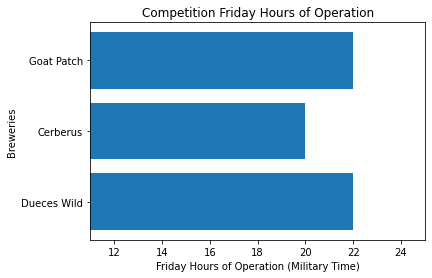

In [95]:
plt.barh(df_breweries['Brewery Name'],df_breweries['Closing Hours'])
plt.ylabel("Breweries")
plt.xlabel("Friday Hours of Operation (Military Time)")
plt.title('Competition Friday Hours of Operation')
plt.xlim(11,25)
plt.show()

In [97]:
# Here we save the data in csv format
df_breweries.to_csv('breweryhours.csv')

# Store the data in a database

In [98]:
import sqlite3

In [99]:
# Load the newly-created database
df_beers = pd.read_csv('breweryhours.csv')

In [100]:
df_beers.head()

,Unnamed: 0,Brewery Name,Opening Hours,Closing Hours
0,0,Dueces Wild,11,22
1,1,Cerberus,11,20
2,2,Goat Patch,11,22


In [101]:
# An unnamed column shows up, not sure why
df_beers = df_beers.drop(columns=['Unnamed: 0'])

In [102]:
df_beers.head()

,Brewery Name,Opening Hours,Closing Hours
0,Dueces Wild,11,22
1,Cerberus,11,20
2,Goat Patch,11,22


In [103]:
# Create the database to store my information
conn = sqlite3.connect('brewerycomp.db')
c = conn.cursor()

In [104]:
# Create a table in the database
c.execute('CREATE TABLE brewery_hours (Name, Open, Close)')
conn.commit()

In [105]:
# Here we load the data into the corresponding table
df_beers.to_sql('brewery_hours',conn,if_exists='replace',index=False)

C:\Users\harol\anaconda3\lib\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [106]:
# Here we close the newly-created database with the updated info
conn.close()

In [107]:
# Here we check to make sure the database was loaded correctly
with sqlite3.connect('brewerycomp.db') as conn:
    cursor = conn.cursor()
    rows = cursor.execute('SELECT * FROM brewery_hours')
    for x in rows:
        print(x)

('Dueces Wild', 11, 22)
('Cerberus', 11, 20)
('Goat Patch', 11, 22)
